In [14]:
# Gives the discrete, linear convolution of two one-dimensional sequences.
# some goodies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import convolutionF as F
from scipy.stats import norm

<function matplotlib.pyplot.show>

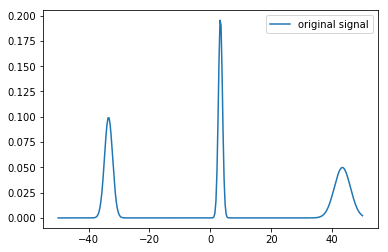

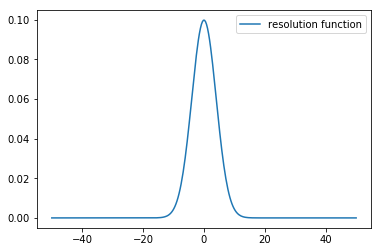

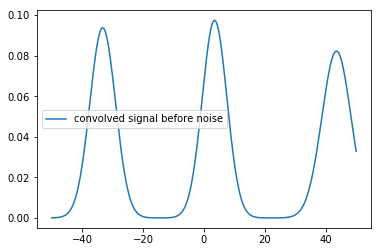

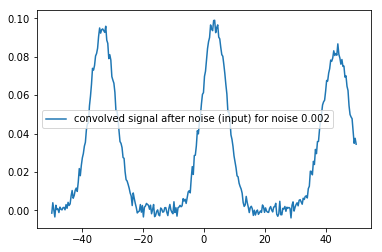

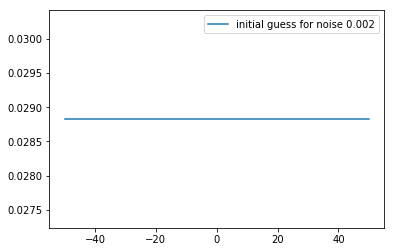

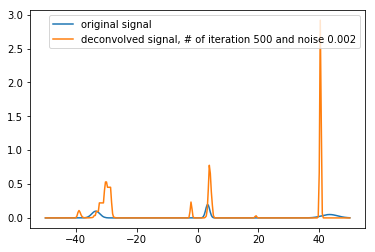

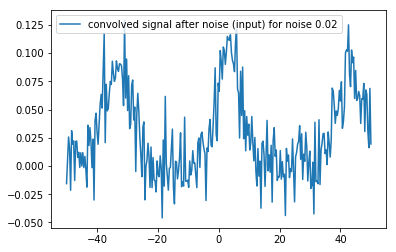

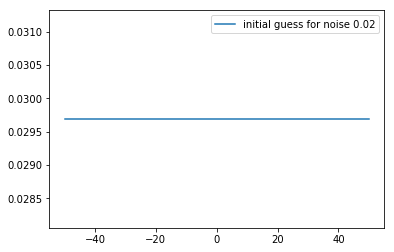

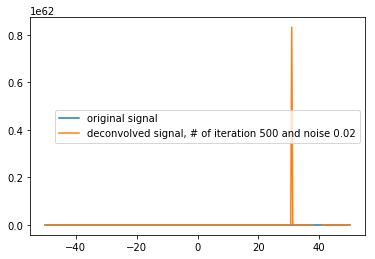

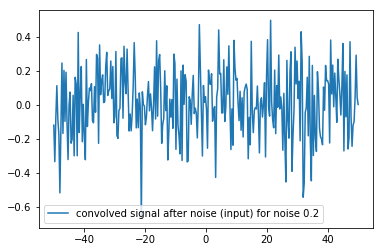

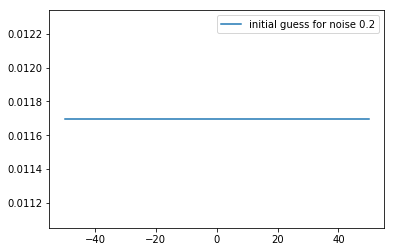

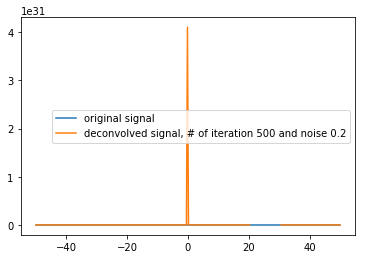

In [18]:

x = np.linspace(-50, 50, 100)
xs=np.linspace(-50, 50, 300)

sig1= norm.pdf(x,0,4) #original signal1
sig2=norm.pdf(x,10,2) #original signal 2
sig3=norm.pdf(x,30,8) #original signal 3

sigt=np.hstack((sig1,sig2,sig3)) #original total signal
#print(sig.size)

sig = sigt #original signal

RF=norm.pdf(xs,0,4) #resolution function

#print(RF.size)

plt.figure() #plot the original signal
plt.plot(xs,sig, label='original signal')
plt.legend()
plt.show

plt.figure() # plot the resolution function
plt.plot(xs,RF,label='resolution function')
plt.legend()
plt.show  

S_=F.convolve(sig,RF,'same') #convolved signal 

plt.figure() #plot the colvolved signal before noise
plt.plot(xs,S_,label='convolved signal before noise')
plt.legend()
plt.show 


# Adding noise to the convolved signal (input)
noise=[0.002, 0.02, 0.2]

S=0.0* np.ones(len(xs))
S_sum=0.0
ini=0.0 * np.ones(len(S))#initial guess
ini_C=0.0 * np.ones(len(S)) #convolved initial guess
ini_Csum=0.0 #summation of the convolved initial guess
chi_sq=0.0
I=0.0 * np.ones(len(S))  #deconvolved signal  

for n in noise:
    S=S_+ n * np.random.normal(size=len(xs))

    S_sum=np.sum(S,0) #summation of the convolved signal


    #ini=norm.pdf(xs,0,5) #initial guess
    ini=S_sum/len(S) * np.ones(len(S))#initial guess
    ini_C=F.convolve(ini,RF,'same') #convolved initial guess
    #print(ini_C.size) #print the convolved ini guess size


    ini_Csum=np.sum(ini_C,0) #summation of the convolved initial guess

    chi_sq=np.sum(np.divide(np.power(np.subtract(S, ini_C),2.),ini_C),0)

    #print('chi_sq {}'.format(chi_sq))

    plt.figure() #plot the colvolved signal after noise
    plt.plot(xs,S,label='convolved signal after noise (input) for noise {}'.format(n))
    plt.legend()
    #plt.show 

    plt.figure() #plot the initial guess
    plt.plot(xs,ini, label='initial guess for noise {}'.format(n))
    plt.legend()
#plt.show

    g='same'
    no_iteration=500
    I=F.deconvolve(S,RF,ini,g,'iteration',no_iteration)  #deconvolved signal  


    plt.figure() #plot the original signal
    plt.plot(xs,sig, label='original signal')
    plt.legend()
#plt.show
 
    plt.plot(xs,I,label='deconvolved signal, # of iteration {} and noise {}'.format(no_iteration,n))#plot the deconvolved signal with originalsignal
    plt.legend()
plt.show  



